# Task A.3.2: Predict the Rain!  - IOT DATA



## Task I
Use Linear regression, SVM (with Linear kernel), and Random Forest(with a maximum depth of less than 10) algorithms to classify the weather data in 5 output classes: "drizzle", "rain", "sun", "snow", "fog"  (5 pts-Mandatory)

In [127]:
# Libraries

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader

#from sklearn import datasets 
# # Import train_test_split function
from sklearn.model_selection import train_test_split  
#Import scikit-learn dataset library
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

In [175]:
# Load dataset
file_path = 'data/seattle-weather.csv'
data = pd.read_csv(file_path, delimiter=',', usecols=['precipitation','temp_max','temp_min','wind','weather']) # Loading excluding date column

# rename column 'weather' to 'target'
data = data.rename(columns={'weather': 'target'})
data['target'] = data['target'].astype('category').cat.codes # Convert weather to categorical

# Debugging statements
print(data['target'].unique())
print(data.head())
print(data.tail())

X = data[['precipitation','temp_max','temp_min','wind']] #, 'target' # Features
y = data['target'] # Target variable



[0 2 4 3 1]
   precipitation  temp_max  temp_min  wind  target
0            0.0      12.8       5.0   4.7       0
1           10.9      10.6       2.8   4.5       2
2            0.8      11.7       7.2   2.3       2
3           20.3      12.2       5.6   4.7       2
4            1.3       8.9       2.8   6.1       2
      precipitation  temp_max  temp_min  wind  target
1456            8.6       4.4       1.7   2.9       2
1457            1.5       5.0       1.7   1.3       2
1458            0.0       7.2       0.6   2.6       1
1459            0.0       5.6      -1.0   3.4       4
1460            0.0       5.6      -2.1   3.5       4


### Linear Regression

In [185]:
X = data[['precipitation','temp_max','temp_min','wind']].values #, 'target' # Features
y = data['target'].values # Target variable

# Convert data to tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

print("Train Tensor Shape:", X.shape)
print("Test Tensor Shape:", y.shape)

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape Train: ", X_train.shape, "Shape Test: ", X_test.shape,
      "Shape y_train: ", y_train.shape, "Shape y_test: ", y_test.shape)

Train Tensor Shape: torch.Size([1461, 4])
Test Tensor Shape: torch.Size([1461, 1])
Shape Train:  torch.Size([1168, 4]) Shape Test:  torch.Size([293, 4]) Shape y_train:  torch.Size([1168, 1]) Shape y_test:  torch.Size([293, 1])


In [186]:
#Section II-defining the model:  linear regression model with 2 layers, input and output
model = nn.Sequential(
  nn.Linear(4, 5), # 5 input features  → 5 output classes 
  nn.Sigmoid()
)
#printing model layers and specifications
print(model)

Sequential(
  (0): Linear(in_features=4, out_features=5, bias=True)
  (1): Sigmoid()
)


In [187]:
#Section III-training the model
n_epochs = 10
batch_size = 32
history_linReg = []
# define loss function
loss_fn = nn.MSELoss()
# define optimizer with a spicific learning rate
optimizer = optim.Adam(model.parameters(), lr=0.001)
for epoch in range(n_epochs):
  for i in range(0, len(X_train), batch_size):
        # take a batch
        Xbatch = X_train[i:i+batch_size]
        ybatch = y_train[i:i+batch_size]
        # forward pass
        y_pred =model(Xbatch) #  torch.max(model(Xbatch), 1)
        loss = loss_fn(y_pred, ybatch)
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        # update weights
        optimizer.step()

  model.eval()
  y_pred = model(X_test)
  mse = loss_fn(y_pred, y_test)
  #mse_train = loss_fn(y_, y_test)
  mse = float(mse)
  history_linReg.append(mse)
  print(f'Finished epoch {epoch}, latest MSE {mse}')

print('Final MSE:', history_linReg[-1])
print('Total MSE:', sum(history_linReg)/len(history_linReg))

c:\Users\ellin\OneDrive\Documents\MSc_IoT_MAU\DA642E-AI-and-Data-Management-for-IOT\.venv\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\ellin\OneDrive\Documents\MSc_IoT_MAU\DA642E-AI-and-Data-Management-for-IOT\.venv\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\ellin\OneDrive\Documents\MSc_IoT_MAU\DA642E-AI-and-Data-Management-for-IOT\.venv\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target si

Finished epoch 0, latest MSE 6.96004581451416
Finished epoch 1, latest MSE 6.645587921142578
Finished epoch 2, latest MSE 6.290507793426514
Finished epoch 3, latest MSE 6.01702880859375
Finished epoch 4, latest MSE 5.453156471252441
Finished epoch 5, latest MSE 4.859267711639404
Finished epoch 6, latest MSE 4.752207279205322
Finished epoch 7, latest MSE 4.7138800621032715
Finished epoch 8, latest MSE 4.691064834594727
Finished epoch 9, latest MSE 4.675168037414551
Final MSE: 4.675168037414551
Total MSE: 5.505791473388672


In [188]:
# compute accuracy (no_grad is optional)
with torch.no_grad():
    y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")

Accuracy 0.0699520856142044


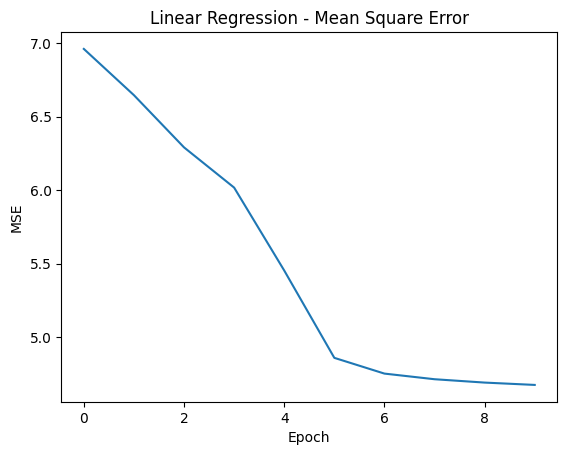

In [189]:
#Section V-visualizing the outputs
plt.plot(history_linReg)
plt.title('Linear Regression - Mean Square Error')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

### SVM

In [107]:
# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create a svm Classifier with Linear Kernel
clf = svm.SVC(kernel='linear') 
#Train the model using the training sets
clf.fit(X_train, y_train) 
#Predict the response for test dataset 
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision and Recall: what percentage of positive tuples are labeled as such? 
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted')) 
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9931740614334471
Precision: 0.9935435647194878
Recall: 0.9931740614334471


In [108]:
# Ensure predictions are 1D
y_pred = np.array(y_pred).flatten()  
y_test = np.array(y_test).flatten()

# Convert data to tensors
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
y_pred = torch.tensor(y_pred, dtype=torch.float32).reshape(-1, 1)

# Debugging, data shapes and unique labels
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")
print(f"y_test unique labels: {set(y_test.numpy().flatten())}")
print(f"y_pred unique labels: {set(y_pred.numpy().flatten())}")
print(f"y_test length: {len(y_test)}")
print(f"y_pred length: {len(y_pred)}")

history_SVM = []  ## list not needed as model only produces one MSE value
# define loss function
loss_fn = nn.MSELoss()
mse = loss_fn(y_pred, y_test).item()
#mse_train = loss_fn(y_, y_test)
mse = float(mse)
history_SVM.append(mse) ##

print('Final MSE:', history_SVM[-1])

y_test shape: torch.Size([293, 1])
y_pred shape: torch.Size([293, 1])
y_test unique labels: {np.float32(0.0), np.float32(1.0), np.float32(2.0), np.float32(3.0), np.float32(4.0)}
y_pred unique labels: {np.float32(0.0), np.float32(1.0), np.float32(2.0), np.float32(3.0), np.float32(4.0)}
y_test length: 293
y_pred length: 293
Final MSE: 0.006825938355177641


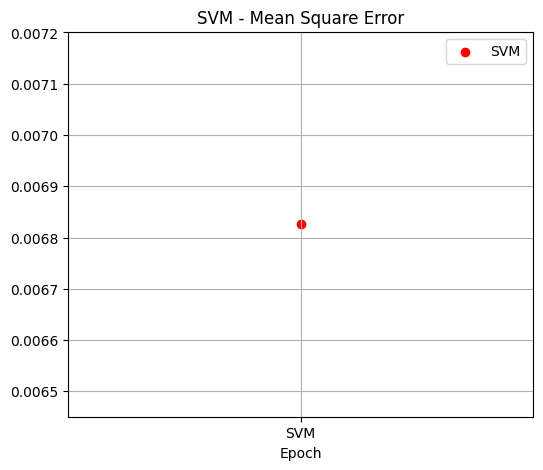

In [109]:
# visualizing the outputs
plt.figure(figsize=(6, 5))
plt.scatter(["SVM"], [history_SVM], color='red')

plt.plot(history_SVM)
plt.title('SVM - Mean Square Error')
plt.xlabel("Epoch")
plt.ylabel("")
plt.grid(True)
plt.legend(["SVM"])
plt.show()

### Random Forest (Max Depth = 10)

In [160]:
X = data[['precipitation','temp_max','temp_min','wind']].values # Features
y = data['target'].values # Target variable

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Debugging statements
"""print("First few rows of X_train:\n", X_train[:5])
print("First few rows of X_test:\n", X_test[:5])
print("First few labels of y_train:", y_train[:5])
print("First few labels of y_test:", y_test[:5])"""

# 🔹 Train Random Forest Classifier
clf = RandomForestClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# 🔹 Make predictions
y_pred = clf.predict(X_test)

# 🔹 Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Optional: Display confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# print("Correlation matrix:\n", pd.DataFrame(X, columns=['precipitation', 'temp_max', 'temp_min', 'wind']).corr())

"""train_set = set(map(tuple, X_train))
test_set = set(map(tuple, X_test))
overlap = train_set & test_set  # Intersection of train and test sets

print(f"Number of duplicate rows between train & test: {len(overlap)}")"""


Accuracy: 0.8294
Confusion Matrix:
 [[  0   0   0   0   9]
 [  0   0   0   0  25]
 [  0   0 110   2   8]
 [  0   0   6   2   0]
 [  0   0   0   0 131]]


'train_set = set(map(tuple, X_train))\ntest_set = set(map(tuple, X_test))\noverlap = train_set & test_set  # Intersection of train and test sets\n\nprint(f"Number of duplicate rows between train & test: {len(overlap)}")'

In [162]:
"""# Ensure predictions are 1D
y_pred = np.array(y_pred)  
y_test = np.array(y_test)"""

# Convert data to tensors
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
y_pred = torch.tensor(y_pred, dtype=torch.float32).reshape(-1, 1)

# Debugging, dataset sizes and unique labels
"""print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")
print(f"y_test unique labels: {set(y_test.numpy().flatten())}")
print(f"y_pred unique labels: {set(y_pred.numpy().flatten())}")
print(f"y_test length: {len(y_test)}")
print(f"y_pred length: {len(y_pred)}")"""

history_RForest = []  
# define loss function
loss_fn = nn.MSELoss()
mse = loss_fn(y_pred, y_test).item()
#mse_train = loss_fn(y_, y_test)
mse = float(mse)
history_RForest.append(mse) ##

print('Final MSE:', history_RForest[-1])

Final MSE: 1.3959044218063354


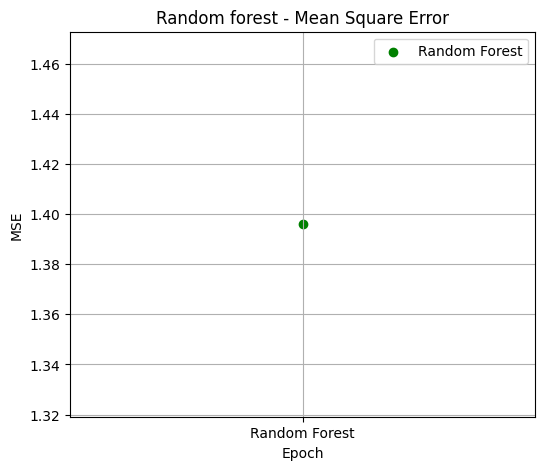

In [163]:
# visualizing the outputs
plt.figure(figsize=(6, 5))
plt.scatter(["Random Forest"], [history_RForest], color='green')

plt.plot(history_RForest)
plt.title('Random forest - Mean Square Error')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.grid(True)
plt.legend(["Random Forest"])
plt.show()

## Task II
### Visualization of MSE

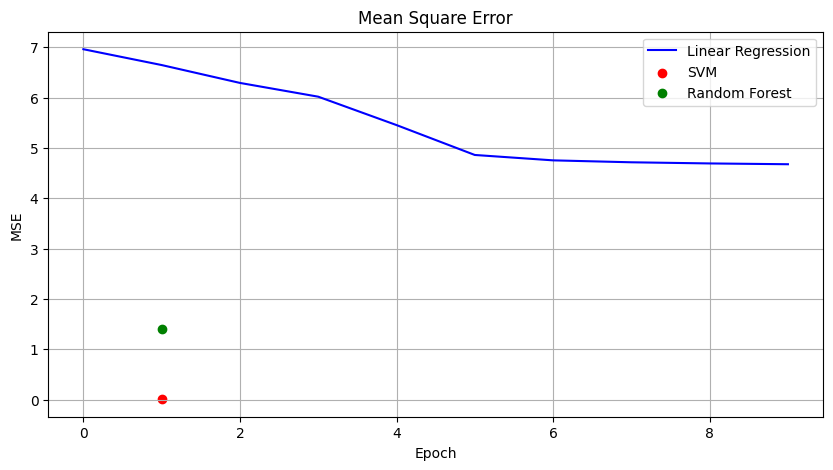

In [254]:
# Visualizing
epochs = list(range(len(history_linReg)))

# Visualizing
plt.figure(figsize=(10, 5))
plt.plot(epochs, history_linReg, color='blue', label="Linear Regression")
plt.scatter([1], [history_SVM[0]], color='red', label="SVM")
plt.scatter([1], [history_RForest[0]], color='green', label="Random Forest")

plt.title('Mean Square Error')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.grid(True)
plt.legend(loc= 'upper right')

plt.savefig('MSE_A.3.2_Task-II.png')
plt.show()




